# Delaunay Triangulation Area Distribution

Trying to determine the distribution of the areas of simplices obtained via Delaunay triangulation.
The points used for the triangulation are normally distributed.

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import pandas as pd
import math

In [20]:
plt.rcParams["figure.figsize"] = (9, 8) # (w, h)

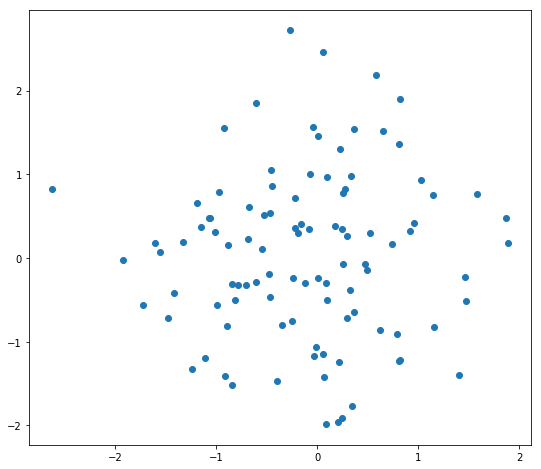

In [21]:
np.random.seed(42)
nb_points = 100

points = np.random.normal(loc=0.0, scale=1.0, size=nb_points*2).reshape(nb_points, 2)
plt.scatter(points[:, 0], points[:, 1])

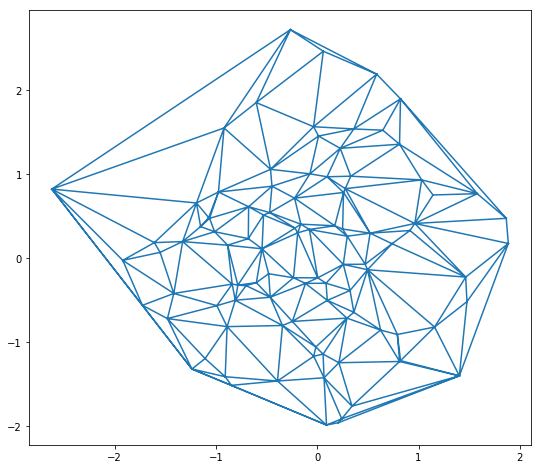

In [5]:
tri = Delaunay(points)

plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())

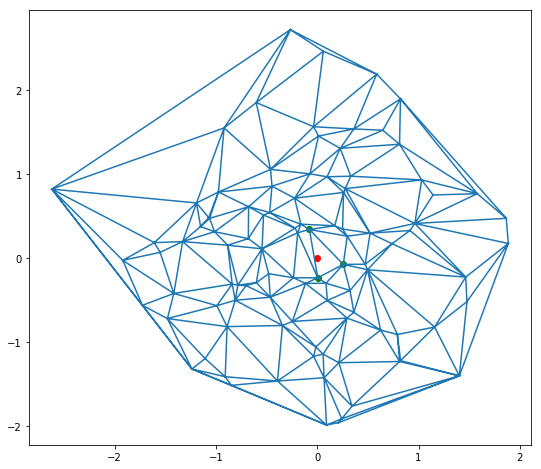

In [6]:
simplex_index = tri.find_simplex([0.0, 0.0])
simplex_points_indices = tri.simplices[simplex_index]

plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
plt.scatter(points[simplex_points_indices[0], 0], points[simplex_points_indices[0], 1], color="green")
plt.scatter(points[simplex_points_indices[1], 0], points[simplex_points_indices[1], 1], color="green")
plt.scatter(points[simplex_points_indices[2], 0], points[simplex_points_indices[2], 1], color="green")
plt.scatter(0.0, 0.0, color="red")

(-2.6197451040897444, -1.9875689146008928, 1.8861859012105302, 2.720169166589619)
width: 4.505931005300274 | height: 4.707738081190511 | square_convex_hull_area: 21.212742984869145


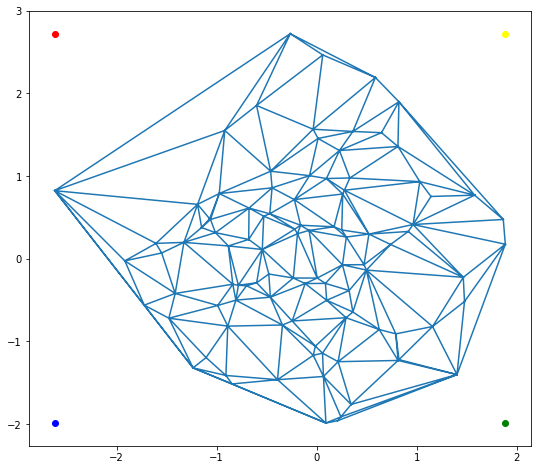

In [7]:
# Square Convex Hull
min_x, min_y, max_x, max_y = np.min(points[:, 0]), np.min(points[:, 1]), np.max(points[:, 0]), np.max(points[:, 1])
print((min_x, min_y, max_x, max_y))

width = max_x - min_x
height = max_y - min_y
square_convex_hull_area =  width * height
print("width: {} | height: {} | square_convex_hull_area: {}".format(width, height, square_convex_hull_area))

plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
plt.scatter(min_x, min_y, color="blue")
plt.scatter(min_x, max_y, color="red")
plt.scatter(max_x, min_y, color="green")
plt.scatter(max_x, max_y, color="yellow")

In [8]:
def random_point_in_square_hull():
    return [(np.random.random() * width) + min_x, (np.random.random() *height) + min_y]

nb_mc_points = 20000
mc_points = np.array([random_point_in_square_hull() for i in range(nb_mc_points)])

# plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
# plt.scatter(mc_points[:, 0], mc_points[:, 1], color="tab:orange")

In [9]:
mc_simplices = np.array([tri.find_simplex(point) for point in mc_points])

print("# MC points: {} | Points in hull: {} | Ratio: {}"
      .format(nb_mc_points, np.sum(mc_simplices != -1), np.sum(mc_simplices != -1) / nb_mc_points))

# MC points: 20000 | Points in hull: 12471 | Ratio: 0.62355


In [10]:
unique, counts = np.unique(mc_simplices[mc_simplices != -1], return_counts=True)
#dict(zip(unique, counts))

(array([134.,  32.,  13.,   3.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([  1. ,  71.1, 141.2, 211.3, 281.4, 351.5, 421.6, 491.7, 561.8,
        631.9, 702. ]),
 <a list of 10 Patch objects>)

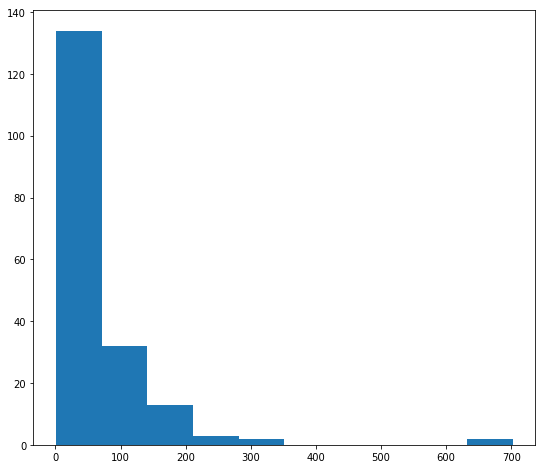

In [11]:
plt.hist(counts)

In [12]:
df_mc_simplices_hits = pd.DataFrame(data=list(zip(unique, counts)), columns=["simplex", "nb_hits"]).set_index("simplex")

top_ten_hits = df_mc_simplices_hits.sort_values(by="nb_hits", ascending=False).head(10)
top_ten_hits

,nb_hits
simplex,
15,702
35,679
77,350
109,292
44,264
16,251
76,212
159,210
52,204


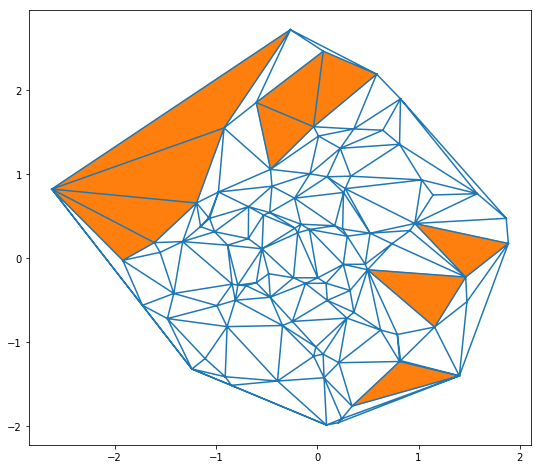

In [13]:
def draw_simplex(simplex_index):
    simplex_points_indices = tri.simplices[simplex_index]
    polygon = plt.Polygon(np.array([
        [points[simplex_points_indices[0], 0], points[simplex_points_indices[0], 1]],
        [points[simplex_points_indices[1], 0], points[simplex_points_indices[1], 1]],
        [points[simplex_points_indices[2], 0], points[simplex_points_indices[2], 1]]
    ]), color="tab:orange")
    plt.gca().add_patch(polygon)



plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
for index in top_ten_hits.index:
    draw_simplex(index)

# Heron's formula

$$A = \sqrt{s(s-a)(s-b)(s-c)} \quad\text{ where }\quad s = \frac{1}{2}(a+b+c) $$

In [15]:
def herons(a, b, c):
    s = (a + b + c) / 2
    area = math.sqrt(s * (s - a) * (s - b) * (s - c))
    return area

herons(a = 4.503, b = 2.377, c = 3.902)

4.63511081571606

In [26]:
areas = []
for simplex_point_indices in tri.simplices:
    simplex_points = [points[point_index] for point_index in simplex_point_indices]
    area = herons(
        a = np.linalg.norm(simplex_points[0] - simplex_points[1]),
        b = np.linalg.norm(simplex_points[1] - simplex_points[2]),
        c = np.linalg.norm(simplex_points[2] - simplex_points[0])
    )
    areas.append(area)

In [29]:
areas

[0.054963615340661354,
 0.0014955730948698963,
 0.12970746989572554,
 0.048547989381367,
 0.15436308032267157,
 0.06395349997069967,
 0.21002439374496817,
 0.023339949403488176,
 0.054232330316581034,
 0.04183563118145589,
 0.10554747818499118,
 0.09665249827416818,
 0.09647229259076666,
 0.05066471366607996,
 0.18860796845663633,
 0.756541516153128,
 0.24971447588967327,
 0.13155893375720054,
 0.0009947453728201276,
 0.02488407674373038,
 0.02643290296877154,
 0.014052733034366865,
 0.0681540577157683,
 0.1108804439062529,
 0.0022544862774063843,
 0.01846161451440639,
 0.06120682756642098,
 0.049502333729425065,
 0.06083133159601427,
 0.1298161440225691,
 0.021483601962060745,
 0.013211260933016564,
 0.043168360184911436,
 0.037934606755924645,
 0.06309779905683356,
 0.6605486181276514,
 0.07901855477629477,
 0.028487196263225104,
 0.07860570793645105,
 0.053497208678276904,
 0.05664190226393461,
 0.054357480492853265,
 0.10983028989146934,
 0.1325769228482586,
 0.268064251794687,
 0.

(array([135.,  32.,  14.,   4.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([0.00081418, 0.07638691, 0.15195965, 0.22753238, 0.30310511,
        0.37867785, 0.45425058, 0.52982332, 0.60539605, 0.68096878,
        0.75654152]),
 <a list of 10 Patch objects>)

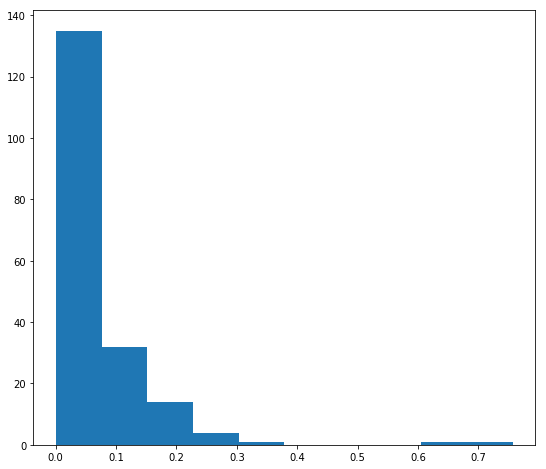

In [28]:
plt.hist(areas)

(array([134.,  32.,  13.,   3.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([  1. ,  71.1, 141.2, 211.3, 281.4, 351.5, 421.6, 491.7, 561.8,
        631.9, 702. ]),
 <a list of 10 Patch objects>)

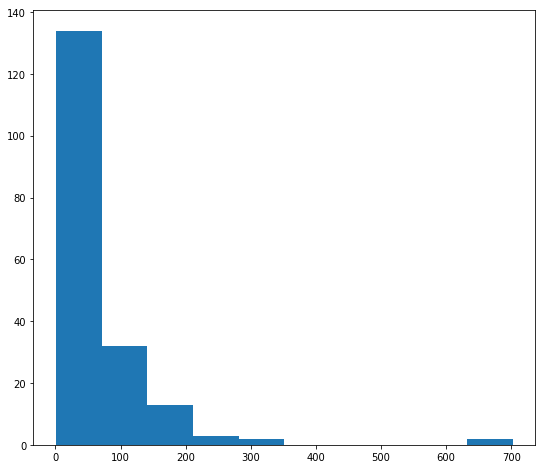

In [30]:
plt.hist(counts)